In [1]:
import pandas as pd
import sys
sys.path.append('../scripts')
from plots import plot_histogram, plot_boxplot, calculate_correlations,generate_all_categorical_crosstabs, correlation_matrix
from preprocess import normalize_date, to_datetime, find_outliers, find_and_replace_outliers_with_median

In [2]:
DATA_PATH = '../data'

In [3]:

fraud_data = pd.read_csv(f'{DATA_PATH}/Fraud_Data.csv')

In [4]:
ip_data = pd.read_csv(f'{DATA_PATH}/IpAddress_to_Country.csv')

In [5]:
credit_carddata = pd.read_csv(f'{DATA_PATH}/creditcard.csv')

In [7]:
fraud_data = to_datetime(fraud_data,'purchase_time')
fraud_data = to_datetime(fraud_data, 'signup_time')

### Remove outliners

check and removes outliners from the fraud_data

In [9]:
fraud_data = find_and_replace_outliers_with_median(fraud_data, ['purchase_value'])
find_outliers(fraud_data)

Processing columns: ['purchase_value']
Found 202 outliers in column 'purchase_value'.
Median value for 'purchase_value' (used for replacement): 35.0
Outliers in column 'purchase_value' replaced with median.
No outliers found in column 'user_id' using z-score threshold 3.
No outliers found in column 'purchase_value' using z-score threshold 3.
No outliers found in column 'age' using z-score threshold 3.
No outliers found in column 'ip_address' using z-score threshold 3.
Found 14151 outliers in column 'class'.


['class']

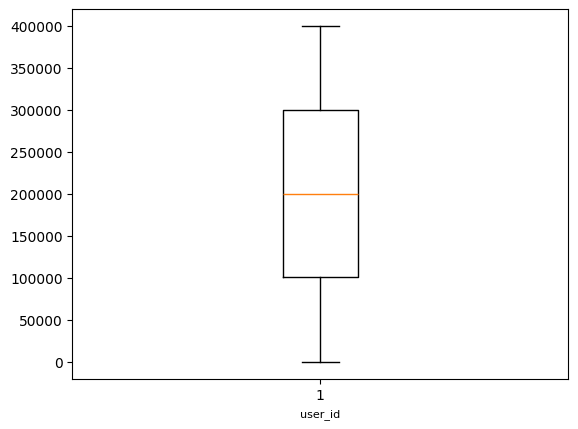

<Figure size 1000x700 with 0 Axes>

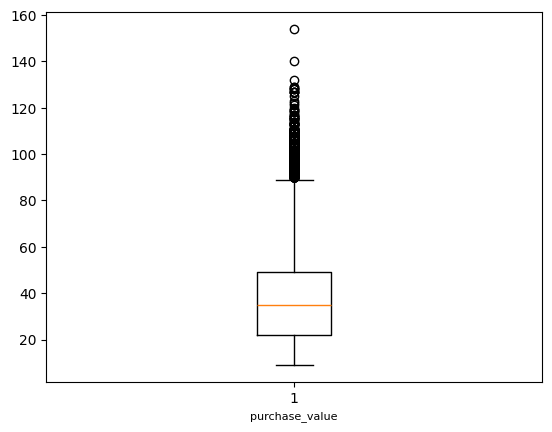

<Figure size 1000x700 with 0 Axes>

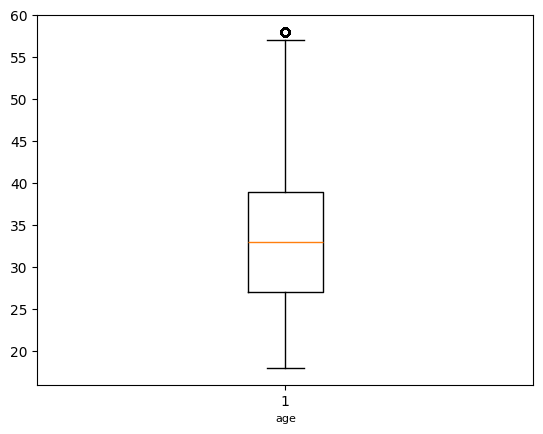

<Figure size 1000x700 with 0 Axes>

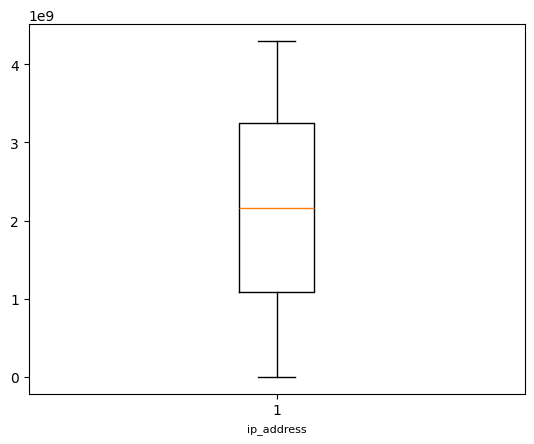

<Figure size 1000x700 with 0 Axes>

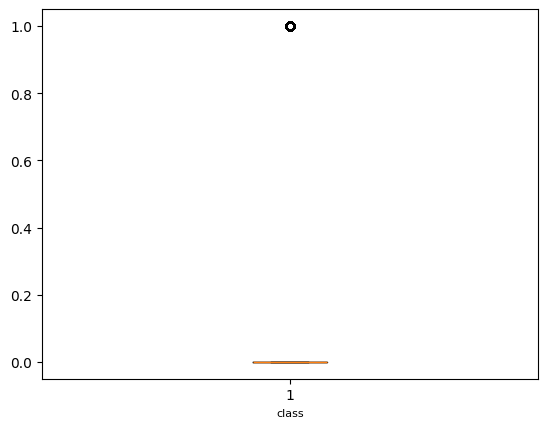

<Figure size 1000x700 with 0 Axes>

In [9]:
plot_boxplot(fraud_data,[])

## univariant analysis

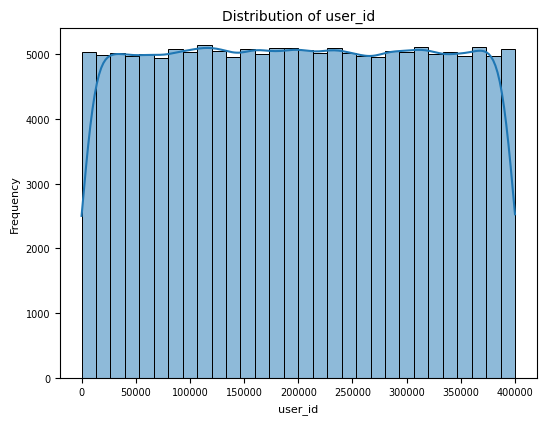

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(df_to_plot), x=col,


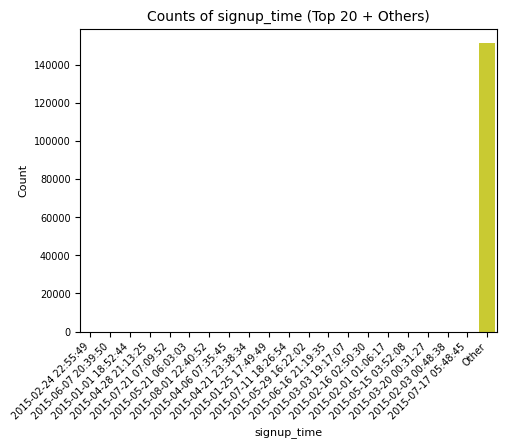

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(df_to_plot), x=col,


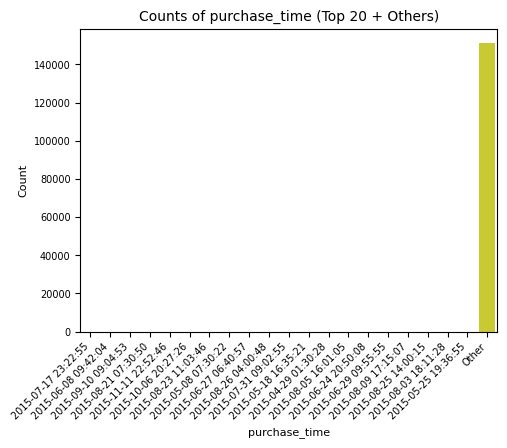

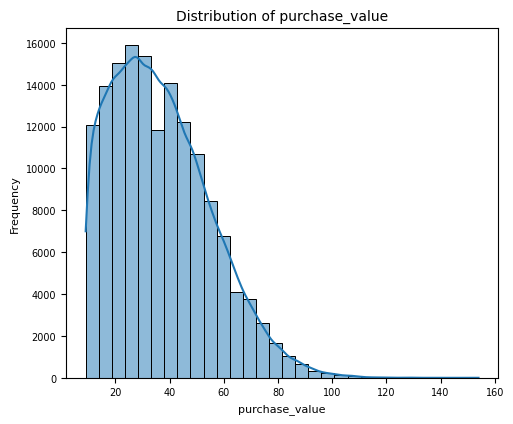

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(df_to_plot), x=col,


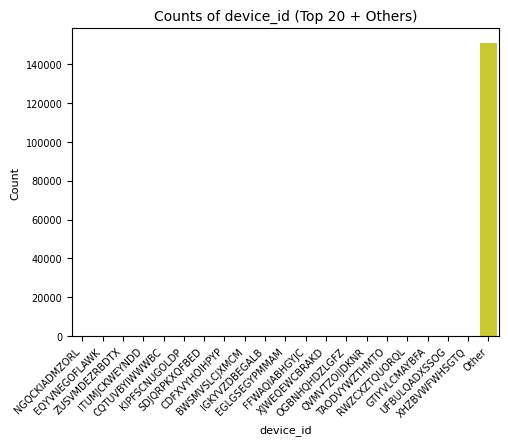

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=value_counts.index, palette='viridis', ax=ax)


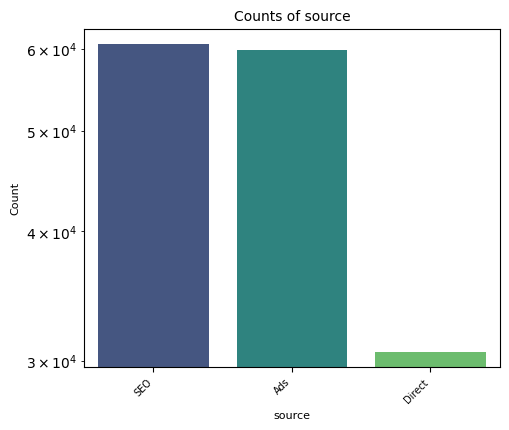

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=value_counts.index, palette='viridis', ax=ax)


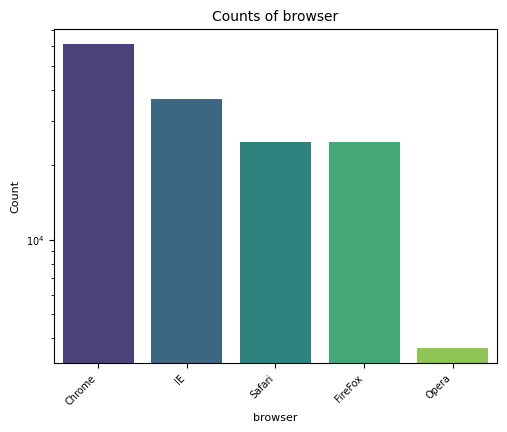

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=value_counts.index, palette='viridis', ax=ax)


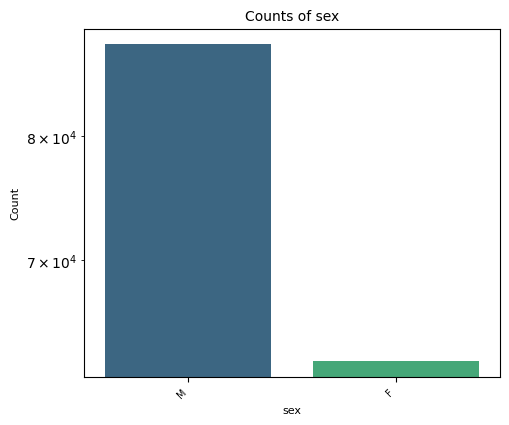

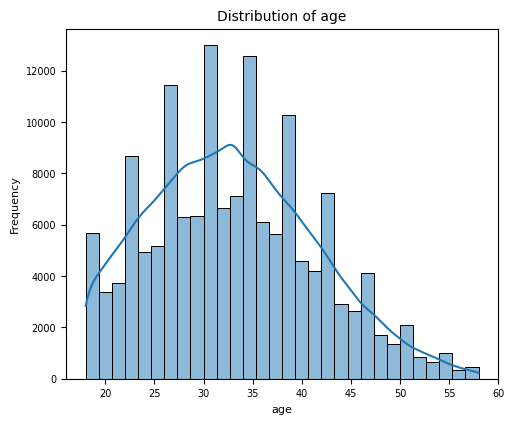

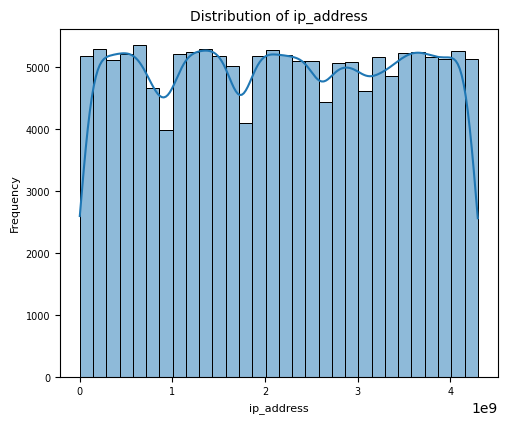

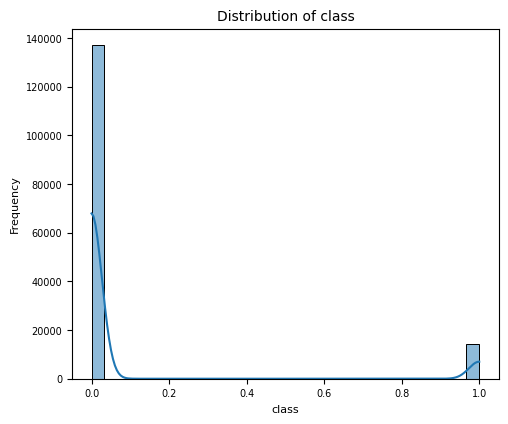

In [10]:
plot_histogram(fraud_data, [])

## bivariant analysis

In summary, this code snippet calculates the Pearson correlation matrix for your fraud_data and then visualizes this matrix as a heatmap, allowing you to quickly see the linear relationships between different features in your dataset.


--- Pearson Correlation Matrix ---
                 user_id  purchase_value       age  ip_address     class
user_id         1.000000        0.002617  0.001072   -0.003144  0.001945
purchase_value  0.002617        1.000000  0.002362   -0.000328  0.001011
age             0.001072        0.002362  1.000000    0.001450  0.006932
ip_address     -0.003144       -0.000328  0.001450    1.000000 -0.005208
class           0.001945        0.001011  0.006932   -0.005208  1.000000

--- Spearman Correlation Matrix ---
                 user_id  purchase_value       age  ip_address     class
user_id         1.000000        0.002684  0.001278   -0.003156  0.001945
purchase_value  0.002684        1.000000  0.002674    0.000434  0.000929
age             0.001278        0.002674  1.000000    0.001830  0.007653
ip_address     -0.003156        0.000434  0.001830    1.000000 -0.005271
class           0.001945        0.000929  0.007653   -0.005271  1.000000


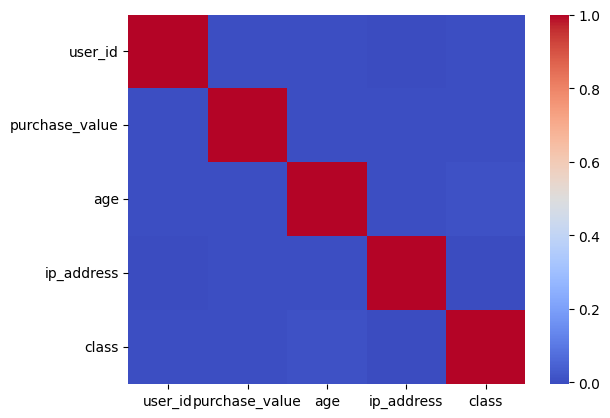

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
result = calculate_correlations(fraud_data)
sns.heatmap(result['pearson_corr'], cmap='coolwarm')
plt.show()


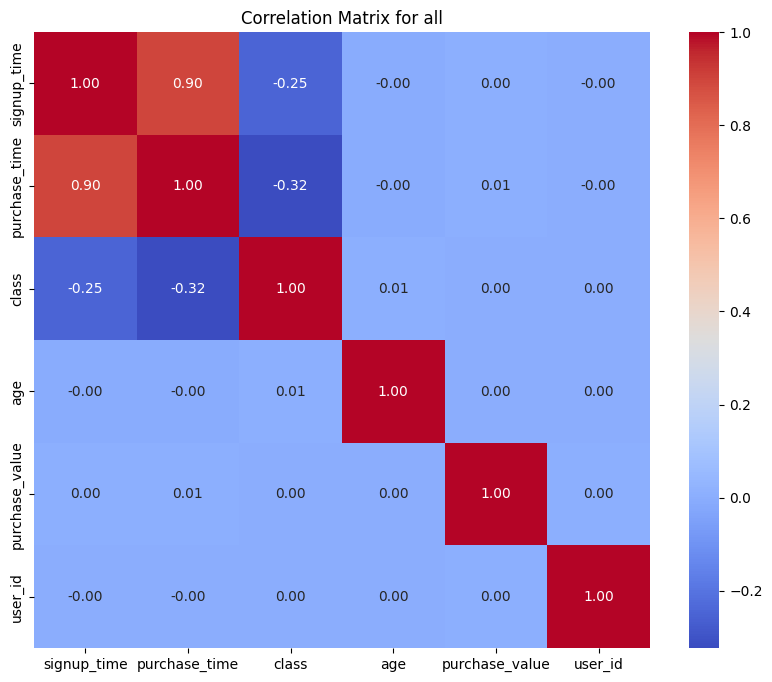

In [12]:
correlation_matrix(fraud_data,['signup_time', 'purchase_time','class','age', 'purchase_value', 'user_id'], 'all')

In [13]:
result = generate_all_categorical_crosstabs(fraud_data, normalize_method='index')

Found 4 categorical columns: ['device_id', 'source', 'browser', 'sex']

Generating contingency tables for all unique pairs...

--- Crosstab: 'device_id' vs 'source' ---
source         Ads  Direct  SEO
device_id                      
AAALBGNHHVMKG  0.0     1.0  0.0
AAAWIHVCQELTP  1.0     0.0  0.0
AAAXJHWCLISKY  1.0     0.0  0.0
AAAXXOZJRZRAO  1.0     0.0  0.0
AABFGRPBQHWFQ  1.0     0.0  0.0
...            ...     ...  ...
ZZZGSIJRNCXBJ  1.0     0.0  0.0
ZZZIKLJSVSQMF  1.0     0.0  0.0
ZZZKJIZHJEDFN  0.0     1.0  0.0
ZZZMVOGBAJVTM  1.0     0.0  0.0
ZZZXASJUVUNMV  0.0     1.0  0.0

[137956 rows x 3 columns]

--- Crosstab: 'device_id' vs 'browser' ---
browser        Chrome  FireFox   IE  Opera  Safari
device_id                                         
AAALBGNHHVMKG     1.0      0.0  0.0    0.0     0.0
AAAWIHVCQELTP     1.0      0.0  0.0    0.0     0.0
AAAXJHWCLISKY     0.0      0.0  1.0    0.0     0.0
AAAXXOZJRZRAO     0.0      1.0  0.0    0.0     0.0
AABFGRPBQHWFQ     0.0      0.0  0.0   


--- Pearson Correlation Matrix ---
            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.5768

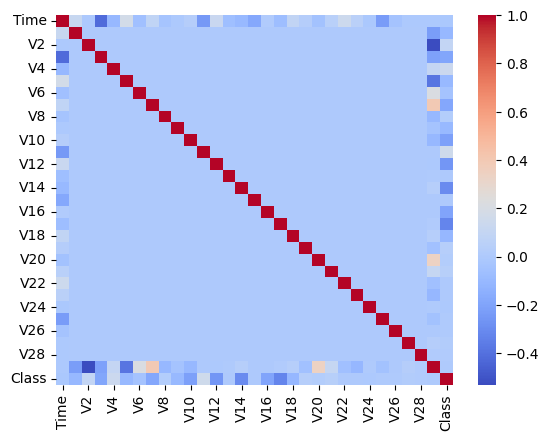

In [14]:
result = calculate_correlations(credit_carddata)
sns.heatmap(result['pearson_corr'], cmap='coolwarm')
plt.show()

## Merge IP dataset with fraud dataset

In [10]:
combined_data = pd.concat([fraud_data, ip_data], axis=1)

In [11]:
sorted_fraud = fraud_data.sort_values('ip_address')
sorted_ip = ip_data.sort_values('lower_bound_ip_address')
merged_df = pd.merge_asof(
    sorted_fraud,
    sorted_ip[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']],
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='forward',
    allow_exact_matches=True
)
fraud_ip_with_country = merged_df[(merged_df['ip_address'] < merged_df['upper_bound_ip_address']) & (merged_df['lower_bound_ip_address'] < merged_df['ip_address'])]

# result_countries = fraud_ip_with_country
# fraud_data['country'] = result_countries

In [12]:
def get_country_for_ip(ip, ip_data_df):
    """
    Finds the country for a given IP address within the ip_data_df ranges.
    """
    mask = (ip_data_df['lower_bound_ip_address'] <= ip) & \
           (ip < ip_data_df['upper_bound_ip_address'])
    
    # Check if there's a match
    if mask.any():
        # Return the country of the first match (assuming no overlapping ranges)
        return ip_data_df.loc[mask, 'country'].iloc[0]
    else:
        return None # Or some other default value like 'Unknown'

# Apply the function to each IP address in fraud_data
fraud_data['located_country'] = fraud_data['ip_address'].apply(
    lambda x: get_country_for_ip(x, ip_data)
)


In [13]:
fraud_data = fraud_data.drop_duplicates()

In [15]:
fraud_data['located_country'] = fraud_data['located_country'].ffill()

In [16]:
fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'located_country'],
      dtype='object')

## Feature Engineering

To prepare raw fraud transaction data into a clean, class balanced, and numerically represented format, ready for machine learning model training

In [17]:
from feature_pipeline import process_frude, fraud_pipeline, credit_pipeline
def split_columns(df:pd.DataFrame, exclude:list[str]):
    numerical_cols = []
    category_cols = []
    for col in df.columns:
        if col in exclude:
            continue
        if pd.api.types.is_numeric_dtype(df[col]):
            numerical_cols.append(col)
        else:
            category_cols.append(col)
    return (numerical_cols, category_cols)
numerical_cols, category_cols = split_columns(fraud_data, ['class'])

train_setup = process_frude(fraud_data, numerical_cols, category_cols, fraud_pipeline,'class')

['user_id', 'purchase_value', 'age', 'ip_address', 'signup_time', 'purchase_time', 'device_id', 'source', 'browser', 'sex', 'located_country']
Original Training Set Class Distribution:
class
0    95872
1     9906
Name: count, dtype: int64
--------------------------------------------------
Shape of X_train_processed_df after pipeline: (105778, 51)
First 5 rows of X_train_processed_df (features engineered, scaled, encoded):
        num__user_id  num__purchase_value  num__age  num__ip_address  \
61049       0.427657             0.309024 -0.241342        -0.597850   
141787     -0.868316             0.081820 -0.123010        -1.027313   
84407       0.879840            -1.395007  0.350318        -0.657122   
115800     -0.270130            -1.395007 -1.661327         0.321883   
61857       0.376487             0.252223 -0.596339         0.589787   

        minmax__user_id  minmax__purchase_value  minmax__age  \
61049          0.623096                  0.4125        0.325   
141787       

In [18]:
credit_numerical_cols, credit_category_cols = split_columns(credit_carddata,['Class'])
credit_train_setup = process_frude(credit_carddata, credit_numerical_cols, credit_category_cols, credit_pipeline,'Class')

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Original Training Set Class Distribution:
Class
0    199020
1       344
Name: count, dtype: int64
--------------------------------------------------
Shape of X_train_processed_df after pipeline: (199364, 30)
First 5 rows of X_train_processed_df (features engineered, scaled, encoded):
        num__Time   num__V1   num__V2   num__V3   num__V4   num__V5   num__V6  \
249927   1.257992 -0.005578  0.427819  0.108347 -0.534196  0.425864 -0.489116   
214082   0.939713  0.904109 -0.110138 -1.449361  0.840920  0.442776 -0.760782   
106005  -0.528960 -0.550544 -2.676901 -0.919977  0.331363 -1.496917 -0.573444   
58619   -0.977583 -0.263360  0.619460 -0.403529 -0.551463  1.783666  2.495035   
191638   0.725456 -0.325205  0.129183  0.187309 -1.261520  1.885635  3.011145   

         num__V7   num

### Model building

#### for fraud data on eccommerce

In [19]:
from model_train import TrainModel
train = TrainModel(train_setup)
train.run("eccommerce")

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
Successfully re

🏃 View run able-goat-725 at: http://127.0.0.1:8080/#/experiments/781422193514839311/runs/17dd2c6672a94b7fa216497a2bfc9e5c
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/781422193514839311


/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
Registered model 'tracking-eccommerce' already exists. Creating a new version of this model...
2025/07/23 19:22:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-eccommerce, version 2
Created version '2' of model 'tracking-eccommerce'.


🏃 View run amazing-gnat-237 at: http://127.0.0.1:8080/#/experiments/911192468454672780/runs/879861c7037e49e0a9909b9025450e5b
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/911192468454672780


/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
Registered model 'tracking-eccommerce' already exists. Creating a new version of this model...
2025/07/23 19:24:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-eccommerce, version 3


🏃 View run receptive-mole-381 at: http://127.0.0.1:8080/#/experiments/915910102883167188/runs/afe2b5a96ed4476399d47477f68083d1
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/915910102883167188


Created version '3' of model 'tracking-eccommerce'.


#### for credit data

In [ ]:
credit_train = TrainModel(credit_train_setup)
credit_train.run("bank_transaction")


/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
Registered mode

🏃 View run thoughtful-fox-880 at: http://127.0.0.1:8080/#/experiments/781422193514839311/runs/8677f9473437492cadf83e7dccc70b3b
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/781422193514839311
